In [2]:
pip install Dataframe_image

# Import required libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import dataframe_image as dfi

# Load Dataset 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df1=df.head(30)
dfi.export(df1,'diabe1dataset.png',table_conversion = 'matplotlib')

# Data Exploration 

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.size

6912

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# preprocessing the dataset

# 1. drop the duplicate row records

In [10]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(768, 9)
(768, 9)


In [11]:
# here there is no duplicates records are presents 


# 2. find the missing values

In [12]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# here ,there is no missing values are present 

In [15]:
des=df.describe()
des

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
dfi.export(des,'diabe.png',table_conversion = 'matplotlib')

# Data Visulization 

# 1. count how many people have diabetes or not 

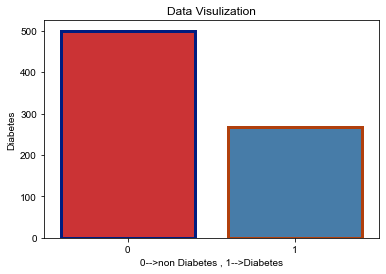

In [17]:
sns.countplot(x="Outcome",data=df,palette="Set1",linewidth=3,edgecolor=sns.color_palette("dark", 2))
sns.set_theme(style="darkgrid")
plt.xlabel("0-->non Diabetes , 1-->Diabetes")
plt.ylabel("Diabetes")
plt.title("Data Visulization")
plt.show()

In [18]:
df_corr=df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
dfi.export(df_corr,'diabe.png',table_conversion = 'matplotlib')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


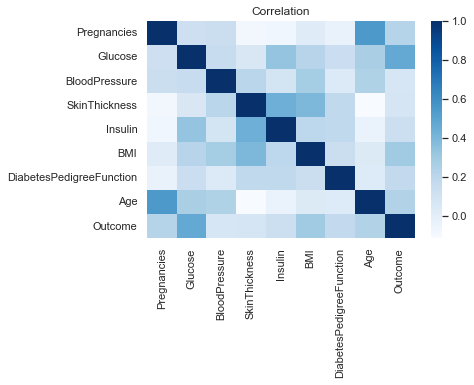

In [20]:
sns.heatmap(df_corr,cmap='Blues')
plt.title("Correlation")
plt.show()

# Divide the dataset into training and testing 

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
Input=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [23]:
target=df[['Outcome']]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(Input,target,test_size=0.25)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(576, 7)
(576, 1)
(192, 1)
(192, 1)


# Build Model 

In [26]:
diabcheckmodel=LogisticRegression()

In [27]:
diabcheckmodel.fit(x_train,y_train)

C:\Users\techsaksham_Priya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\techsaksham_Priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
acc=diabcheckmodel.score(x_test,y_test)
print("Accuracy=",acc*100,"%")

Accuracy= 81.25 %


In [29]:
y_pred=diabcheckmodel.predict(x_test)

In [30]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[119,  21],
       [ 15,  37]], dtype=int64)

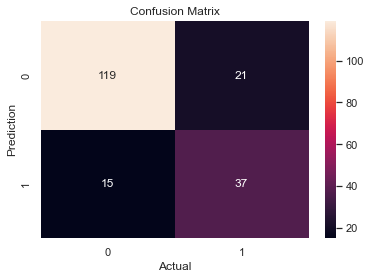

In [31]:
labels=['True Neg','False Pos','False Neg','True Pos']
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix,annot=True,fmt='')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [39]:
dfra1=classification_report(y_test,y_pred)
print(dfra1)


              precision    recall  f1-score   support

           0       0.89      0.85      0.87       140
           1       0.64      0.71      0.67        52

    accuracy                           0.81       192
   macro avg       0.76      0.78      0.77       192
weighted avg       0.82      0.81      0.82       192



In [33]:
pred_poc=diabcheckmodel.predict_proba(x_test)
print(pred_poc)

[[0.73164512 0.26835488]
 [0.83403878 0.16596122]
 [0.14961221 0.85038779]
 [0.47097769 0.52902231]
 [0.60058548 0.39941452]
 [0.97073006 0.02926994]
 [0.89593111 0.10406889]
 [0.94912567 0.05087433]
 [0.19192169 0.80807831]
 [0.97809253 0.02190747]
 [0.54030617 0.45969383]
 [0.43937088 0.56062912]
 [0.93457993 0.06542007]
 [0.76518844 0.23481156]
 [0.89087359 0.10912641]
 [0.68550498 0.31449502]
 [0.02481425 0.97518575]
 [0.67135149 0.32864851]
 [0.86961666 0.13038334]
 [0.83860481 0.16139519]
 [0.80079227 0.19920773]
 [0.31041183 0.68958817]
 [0.69452425 0.30547575]
 [0.87383704 0.12616296]
 [0.4902243  0.5097757 ]
 [0.79286129 0.20713871]
 [0.42780041 0.57219959]
 [0.03848947 0.96151053]
 [0.20650919 0.79349081]
 [0.74745792 0.25254208]
 [0.20727503 0.79272497]
 [0.46547184 0.53452816]
 [0.8272206  0.1727794 ]
 [0.85167599 0.14832401]
 [0.30174563 0.69825437]
 [0.00653528 0.99346472]
 [0.80137821 0.19862179]
 [0.46453098 0.53546902]
 [0.57520868 0.42479132]
 [0.80569628 0.19430372]


In [34]:
fpr1,tpr1,thresh1=roc_curve(y_test,pred_poc[:,0],pos_label=0)
fpr2,tpr2,thresh2=roc_curve(y_test,pred_poc[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]

In [35]:
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
auc_score1=roc_auc_score(y_test,pred_poc[:,0])*100
auc_score2=roc_auc_score(y_test,pred_poc[:,1])*100

In [36]:
auc_score1

17.6510989010989

In [37]:
auc_score2

82.3489010989011

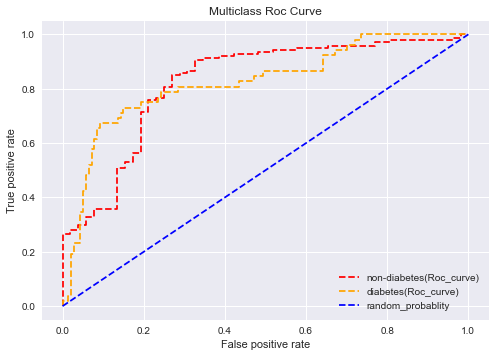

In [38]:
plt.style.use('seaborn')
plt.plot(fpr1,tpr1,linestyle='--',color='red',label='non-diabetes(Roc_curve)')
plt.plot(fpr2,tpr2,linestyle='--',color='orange',label='diabetes(Roc_curve)')
plt.plot(p_fpr,p_tpr,linestyle="--",color='blue',label="random_probablity")
plt.legend(loc='best')
plt.title("Multiclass Roc Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()